## American Sign language
![sign_language](Dataset\amer_sign2.png)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

## Dataset

In [2]:
training_data = pd.read_csv('Dataset\sign_mnist_train\sign_mnist_train.csv')
test_data = pd.read_csv('Dataset\sign_mnist_test\sign_mnist_test.csv')
training_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Data Preprocessing

In [3]:
labels = training_data['label']
train=training_data.drop(training_data.columns[[0]], axis=1)
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


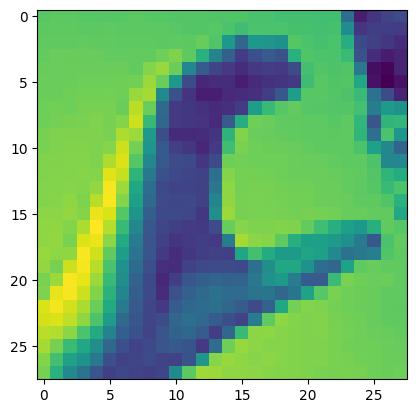

In [4]:
images = np.array(train).reshape((-1, 28, 28, 1))
images = images / 255.0
labels = to_categorical(labels)
plt.imshow(images[2].reshape(28,28))

## Training the model

In [5]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

#hyperparameters
Batch_size = 128
num_classes = 25
Epochs = 20

In [6]:
#The CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [7]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [9]:
#Training the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=Epochs, batch_size=Batch_size)

Epoch 1/20
151/151 [==============================] - 14s 85ms/step - loss: 2.7436 - accuracy: 0.1618 - val_loss: 1.7391 - val_accuracy: 0.5013
Epoch 2/20
151/151 [==============================] - 12s 83ms/step - loss: 1.5075 - accuracy: 0.4985 - val_loss: 0.8372 - val_accuracy: 0.7485
Epoch 3/20
151/151 [==============================] - 12s 83ms/step - loss: 0.8726 - accuracy: 0.7088 - val_loss: 0.4816 - val_accuracy: 0.8615
Epoch 4/20
151/151 [==============================] - 12s 82ms/step - loss: 0.5527 - accuracy: 0.8180 - val_loss: 0.3225 - val_accuracy: 0.9003
Epoch 5/20
151/151 [==============================] - 13s 83ms/step - loss: 0.3782 - accuracy: 0.8731 - val_loss: 0.1804 - val_accuracy: 0.9456
Epoch 6/20
151/151 [==============================] - 13s 84ms/step - loss: 0.2545 - accuracy: 0.9165 - val_loss: 0.1044 - val_accuracy: 0.9786
Epoch 7/20
151/151 [==============================] - 12s 82ms/step - loss: 0.1782 - accuracy: 0.9442 - val_loss: 0.0842 - val_accuracy:

## Visualizing the accuracy of the model

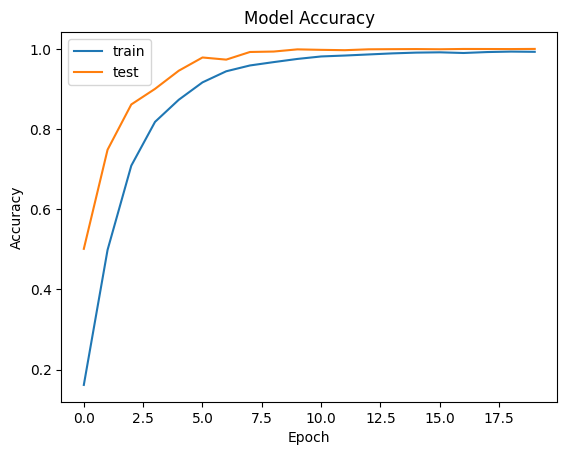

In [10]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])
print('Test loss: ', score[0])

258/258 [==============================] - 2s 6ms/step - loss: 0.0017 - accuracy: 1.0000
Test accuracy: 1.0
Test loss:  0.0016886568628251553


## Test

In [13]:
labels = test_data['label']

test = test_data.drop(test_data.columns[[0]], axis=1)
images = np.array(test).reshape((-1, 28, 28, 1))
images = images / 255.0

pred = np.argmax(model.predict(images), axis = 1)

225/225 [==============================] - 1s 5ms/step


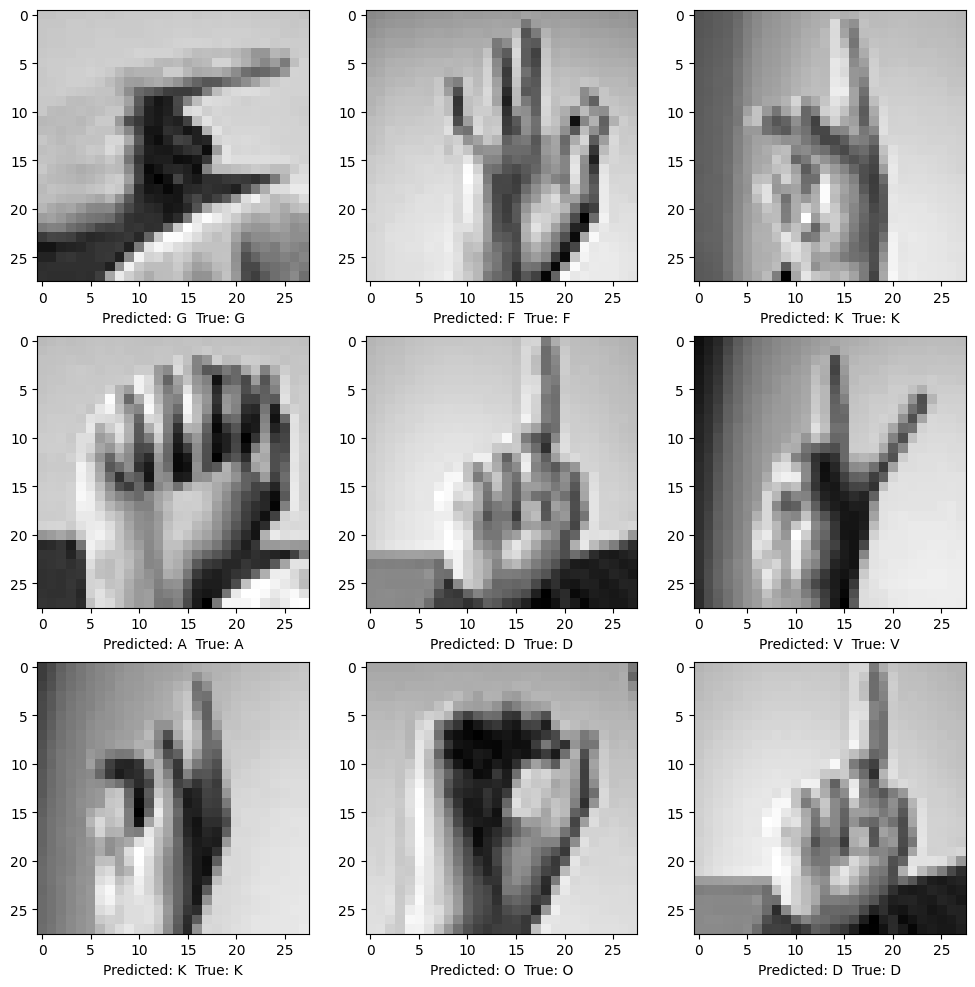

In [17]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(12,12)) 
for i in range(9): 
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i],cmap='gray') 
    plt.ylabel("") 
    plt.xlabel(f"Predicted: {alphabet[pred[i]]}  True: {alphabet[labels[i]]}") 
plt.show()